# Cifar10

Passons à autre chose que du Cats & Dogs. Nous allons essayer de créer un CNN qui va classer non pas 2 mais 10 labels d'images différents. Nous tirons les images du dataset nommé [Cifar10](http://www.cs.utoronto.ca/~kriz/cifar.html) 

* Importez :
  * Tensorflow 2.0
  * Numpy 
  * Matplotlib.pyplot 

In [ ]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [12]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
tf.__version__

'2.3.0'

* En utilisant [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) importez cifar10 et stockez les données dans `X_train, y_train, X_test, y_test`

In [13]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train),(X_test, y_test) = cifar10.load_data()

* Visualisez une image aléatoire de votre dataset 

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[9]')

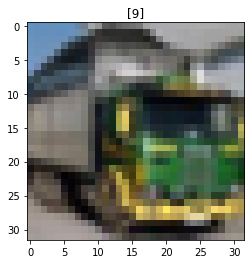

In [15]:
# Visualisation d'une image aléatoire
# On tire un nb aléatoire entre 0 et 100 et on prend l'image
# à l'index correspondant
random_image = np.random.randint(100) 
plt.imshow(X_train[random_image])
plt.title(y_train[random_image])

# Prendre X_train[random_image] équivaut à prendre X_train[random_image,:,:,:] (1 image) 

* Visualisez une image aléatoire de chacun de vos labels dans votre dataset 

index for each image :[0 1 2 3 4 5 6 7 8 9]


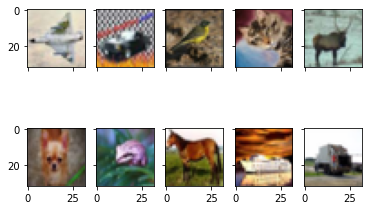

In [16]:
def visualize_random_img_for_each_target(X ,y, nrows, ncols):
  
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
  
  random_image = np.random.randint(100)
  
  index = nrows + ncols
  for row in range(nrows):
    for col in range(ncols):
      mask = y == nrows + ncols - index
      mask = mask.squeeze()
      axes[row, col].imshow(X[mask][random_image])
      index -=1 


  print("index for each image :{}".format(np.unique(y)))

visualize_random_img_for_each_target(X_train,y_train, 2, 5)

In [17]:
# On crée un Dataset à partir de nos données, 
# Encore une fois, on aurait pu laisser X_train et y_train tels quels
# Et les fournir au modèle en appelant model.fit(X_train, y_train)
# Néanmoins, passer par un Dataset va nous permettre (entre autres) 
# de faire de la data augmentation
# Voir la doc pour + d'infos: https://www.tensorflow.org/api_docs/python/tf/data/Dataset

# 1. On référence les données qui vont faire partie de nos datasets d'entrainement et de validation
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_valid = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# 2. On mélange les données puis on demande au dataset de nous retourner des batchs de 16 images
# Cela signifie que notre modele fera 16 forward pass puis calculera le coût moyen sur les 
# 16 prédictions. Ensuite la descente de gradient sera effectuée à partir de ce coût moyen.
# Prendre des batchs plus grands que 1 permet d'accélérer l'entraînement car au lieu de faire
# 16 forward et 16 backward le modele ne fait que 16 forward et 1 backward
ds_train = ds_train.shuffle(50000).batch(16)
ds_valid = ds_valid.shuffle(50000).batch(16)

In [18]:
for example in ds_train.take(1):
  print(example)

(<tf.Tensor: shape=(16, 32, 32, 3), dtype=uint8, numpy=
array([[[[255, 255, 255],
         [249, 249, 247],
         [247, 246, 244],
         ...,
         [250, 246, 246],
         [249, 248, 246],
         [251, 253, 250]],

        [[253, 252, 251],
         [219, 217, 213],
         [200, 196, 189],
         ...,
         [203, 187, 189],
         [219, 209, 209],
         [244, 243, 242]],

        [[252, 250, 249],
         [186, 182, 175],
         [147, 140, 129],
         ...,
         [101,  77,  79],
         [163, 146, 148],
         [239, 235, 235]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255

* Créez un modèle CNN dans lequel vous mettrez des couches convolutionnelles 2D et des couches MaxPool2D 

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="same"), #, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="same"), # strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=32, activation ="relu"),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

x = model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

On compare la taille de notre jeu de données au nombre de parametres du modele. 
L'article suivant explique l'effet d'un modèle trop complexe comparé au nombre de données disponibles https://medium.com/@malay.haldar/how-much-training-data-do-you-need-da8ec091e956

In [20]:
print("nb parametres du modele " + str(model.count_params()))
print("nb examples d'entraînement " + str(X_train.shape[0]))
print("+ de paramètres que de données d'entraînement, on risque d'overfitter...")

nb parametres du modele 144058
nb examples d'entraînement 50000
+ de paramètres que de données d'entraînement, on risque d'overfitter...


* Créez une _Learning Rate Schedule_. Vous pouvez choisir de le faire avec [_ExponentialDecay_](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) ou [d'autres méthodes](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)


[Explication sur les learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

In [27]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que 
# nous entrainons le modèle 
initial_learning_rate = 0.0005

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=6000,
    decay_rate=0.95,
    staircase=True)

* Créez un compileur dans lequel vous choisirez : 
  * Votre optimiseur 
  * Votre loss 
  * Vos métrics 

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

* Faites tourner votre modèle sur 10 epochs 

In [23]:
model.fit(ds_train, epochs=10)

Epoch 1/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.8577 - sparse_categorical_accuracy: 0.3464
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.3582 - sparse_categorical_accuracy: 0.5158
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.1813 - sparse_categorical_accuracy: 0.5861
Epoch 4/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0814 - sparse_categorical_accuracy: 0.6218
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9964 - sparse_categorical_accuracy: 0.6524
Epoch 6/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9408 - sparse_categorical_accuracy: 0.6734
Epoch 7/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8745 - sparse_categorical_accuracy: 0.6959
Epoch 8/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8300 - sparse_categorical_accuracy: 0.7107
Epoch 9/10
3125/3125 [==========

* Evaluez votre modèle

In [ ]:
model.evaluate(ds_valid)

625/625 [==============================] - 1s 2ms/step - loss: 1.0056 - sparse_categorical_accuracy: 0.6604


[1.0055527687072754, 0.6603999733924866]

Notre modèle a l'air d'overfitter (Nos performances sur le jeu de validation 
sont bien inférieures aux performances sur train)
* Tentez d'entrainer votre modèle à nouveau. Cette fois cependant : 
  * Ajoutez l'argument *validation_data = ds_valid*  
  * Profitez en pour enregistrer votre entrainement dans une variable _history_
  
* Que pouvez vous conclure sur votre modèle ?

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="same"), #, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="same"), # strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=32, activation ="relu"),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Il faut réinstancier un modele (réinitialisation aléatoire des poids)
# sinon on repartira du modèle que l'on a entraîné, or on veut pouvoir avoir
# un historique de tout l'entraînement
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

# history va contenir les scores à la fin de chaque epoch sur:
# les données d'entraînement (données vues par le modele)
# les données de validation (données inconnues du modele)
history = model.fit(ds_train, 
                    epochs=15,
                    validation_data = ds_valid)

Epoch 1/15
3125/3125 [==============================] - 10s 3ms/step - loss: 1.9346 - sparse_categorical_accuracy: 0.3155 - val_loss: 1.5009 - val_sparse_categorical_accuracy: 0.4559
Epoch 2/15
3125/3125 [==============================] - 10s 3ms/step - loss: 1.3886 - sparse_categorical_accuracy: 0.4987 - val_loss: 1.2959 - val_sparse_categorical_accuracy: 0.5339
Epoch 3/15
3125/3125 [==============================] - 10s 3ms/step - loss: 1.1848 - sparse_categorical_accuracy: 0.5807 - val_loss: 1.1541 - val_sparse_categorical_accuracy: 0.5930
Epoch 4/15
3125/3125 [==============================] - 10s 3ms/step - loss: 1.0598 - sparse_categorical_accuracy: 0.6292 - val_loss: 1.0543 - val_sparse_categorical_accuracy: 0.6341
Epoch 5/15
3125/3125 [==============================] - 10s 3ms/step - loss: 0.9565 - sparse_categorical_accuracy: 0.6668 - val_loss: 1.0260 - val_sparse_categorical_accuracy: 0.6487
Epoch 6/15
3125/3125 [==============================] - 10s 3ms/step - loss: 0.8896 -

* Regardez ce qu'il y a dans `history.history`

In [29]:
# history.history contient 4 listes:
# La fonction de coût sur les données d'entraînement (loss) et de validation (val_loss)
# L'accuracy (% de bonnes prédictions) sur les données d'entraînement (categorical_accuracy) et de validation (val_sparse_categorical_accuracy)
history.history

{'loss': [1.9346123933792114,
  1.3885955810546875,
  1.1847965717315674,
  1.059831142425537,
  0.9565479159355164,
  0.8896206021308899,
  0.825701892375946,
  0.7722145318984985,
  0.7192232012748718,
  0.6761292815208435,
  0.6312962770462036,
  0.5947793126106262,
  0.5561050176620483,
  0.5223566889762878,
  0.49724993109703064],
 'sparse_categorical_accuracy': [0.31547999382019043,
  0.4987199902534485,
  0.5807200074195862,
  0.6291999816894531,
  0.6667600274085999,
  0.6915000081062317,
  0.7128199934959412,
  0.7318999767303467,
  0.7515000104904175,
  0.7647600173950195,
  0.780019998550415,
  0.792959988117218,
  0.8068199753761292,
  0.818120002746582,
  0.8275799751281738],
 'val_loss': [1.5008832216262817,
  1.2959257364273071,
  1.1540559530258179,
  1.0542672872543335,
  1.0259640216827393,
  1.0442285537719727,
  1.0382813215255737,
  1.0041812658309937,
  0.9901090860366821,
  1.0039821863174438,
  1.0545940399169922,
  1.0711052417755127,
  1.0467740297317505,
  1.

* Regardez maintenant un graphique de l'évolution de votre *loss*  à mesure que les epochs avancent  

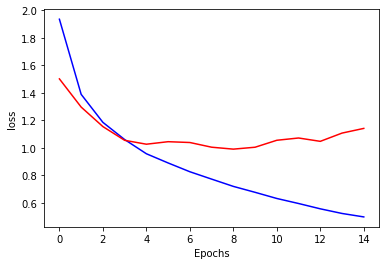

In [30]:
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

* Faites de même avec votre Accuracy 

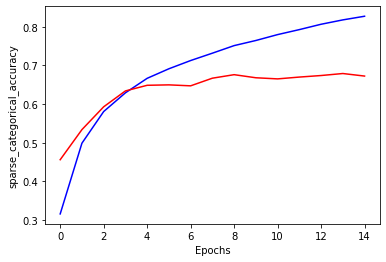

In [31]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

Clairement notre modèle est en sur-apprentissage (overfitting) dès le début. En effet, l'erreur sur les données d'entraînement baisse bien à chaque epoch, en revanche l'erreur sur les données de validation ne cesse d'augmenter. Cela signifie que notre modèle, même après 1 epoch, colle trop aux données d'entraînement. Nous l'avions prévu du fait de la taille du jeu de données, qui contient moins d'exemples que le nombre de paramètres du modèle.
 
 * Un moyen de gérer l'overfitting est de faire ce qu'on appelle de la _Data Augementation_. Le principe est de prendre les images que nous avons dans le jeu de données et de les répéter avec quelques changement mineurs comme : 
  * Changer la couleur, la luminosité 
  * Retourner l'image
  * Couper l'image 

Cette technique permet de créer de nouvelles images sur lesquelles le modèle peut s'entrainer et donc mieux performer ! Tentons de voir ce que cela pourrait donner sur notre jeu de données. 

* Commencez par utiliser la fonction [`.unbatch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#unbatch) sur votre jeu de données d'entrainement et de validation. Nous allons changer la taille des batchs plus tard 

In [48]:
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_valid = tf.data.Dataset.from_tensor_slices((X_test, y_test))
ds_train = ds_train.shuffle(50000).batch(16)
ds_valid = ds_valid.shuffle(50000).batch(16)

ds_train = ds_train.unbatch()
ds_valid = ds_valid.unbatch()

* Vérifiez que vous ayez bien des tenseurs de taille (32, 32, 3) en regardant un exemple dans votre dataset 

In [49]:
for image, label in ds_train.take(1):
  print(tf.shape(image))

tf.Tensor([32 32  3], shape=(3,), dtype=int32)


* En utilisant la fonction [`repeat()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat) copiez votre dataset 10 fois

In [50]:
repeated_ds = ds_train.repeat(10)

* On va procéder maintenant à une phase de Data Augmentation. Créez une fonction `data_aug(image, label)` qui prendra comme argument une image et un label. A l'intérieur de cette fonction, tentez d'utiliser :
  * tf.image.random_flip_left_right
  * tf.image.random_contrast
  * tf.image.random_crop
  * Divisez le tenseur par 255

  * Vous pouvez tentez d'autres choses si vous le souhaitez

In [51]:
def data_aug(image, label):

  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_contrast(image, 0, 3.4)
  image = tf.image.random_crop(image, [32,32, 3])
  image = image / 255

  return image, label

* Utilisez la fonction `.map()` pour appliquer votre fonction sur votre tf dataset

In [52]:
repeated_ds = repeated_ds.map(data_aug)

* Créez une fonction pour votre jeu de données de validation où vous diviserez simplement les tenseurs par 255. Nous ne voulons pas appliquer de data augmentation sur notre jeu de données de validation 

In [53]:
def valid_aug(img, label):
  img = img / 255
  return img, label

* Appliquez la fonction sur votre jeu de données de validation 

In [54]:
ds_valid = ds_valid.map(valid_aug)

* Créez des batchs de 32 images pour votre jeu de données de validation et d'entrainement 

In [55]:
repeated_ds = repeated_ds.shuffle(150000).batch(32)
ds_valid = ds_valid.batch(32)

* Réappliquez le même modèle sur votre nouveau jeu de données
  * N'oubliez pas de stocker votre entrainement dans une variable `history`

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="same"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=32, activation ="relu"),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                131136    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [57]:
history = model.fit(repeated_ds, 
                    epochs=25,
                    validation_data = ds_valid)

Epoch 1/25
15625/15625 [==============================] - 92s 6ms/step - loss: 1.2047 - sparse_categorical_accuracy: 0.5715 - val_loss: 0.9193 - val_sparse_categorical_accuracy: 0.6808
Epoch 2/25
15625/15625 [==============================] - 91s 6ms/step - loss: 0.8884 - sparse_categorical_accuracy: 0.6878 - val_loss: 0.8511 - val_sparse_categorical_accuracy: 0.7104
Epoch 3/25
15625/15625 [==============================] - 89s 6ms/step - loss: 0.7815 - sparse_categorical_accuracy: 0.7251 - val_loss: 0.8172 - val_sparse_categorical_accuracy: 0.7188
Epoch 4/25
15625/15625 [==============================] - 89s 6ms/step - loss: 0.7170 - sparse_categorical_accuracy: 0.7472 - val_loss: 0.8249 - val_sparse_categorical_accuracy: 0.7282
Epoch 5/25
15625/15625 [==============================] - 86s 5ms/step - loss: 0.6657 - sparse_categorical_accuracy: 0.7647 - val_loss: 0.8368 - val_sparse_categorical_accuracy: 0.7234
Epoch 6/25
 5934/15625 [==========>...................] - ETA: 1:01 - loss:

KeyboardInterrupt: ignored

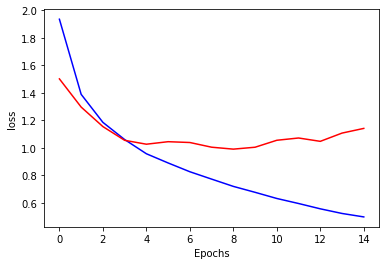

In [58]:
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

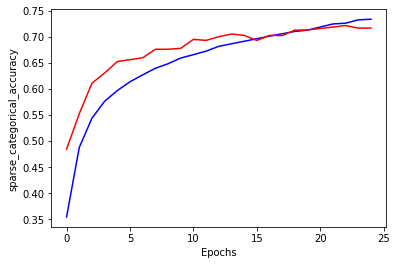

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

* Tentons une nouvelle technique de réguliarisation : le Dropout. Ajoutez quelques couches de dropout à 20% dans votre modèle 

In [ ]:
# Création du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=32, activation ="relu"),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

print(model.summary())

# Learning Rate Schedule 
initial_learning_rate = 0.0005

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True)

# Compileur
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

* Ré-entrainez votre modèle sur 15 à 30 epochs 

In [ ]:
history = model.fit(repeated_ds, 
                    epochs=30,
                    validation_data = ds_valid)

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8469 - sparse_categorical_accuracy: 0.3134 - val_loss: 1.5631 - val_sparse_categorical_accuracy: 0.4504
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5444 - sparse_categorical_accuracy: 0.4439 - val_loss: 1.3881 - val_sparse_categorical_accuracy: 0.5145
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4159 - sparse_categorical_accuracy: 0.4963 - val_loss: 1.2455 - val_sparse_categorical_accuracy: 0.5592
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3227 - sparse_categorical_accuracy: 0.5313 - val_loss: 1.1882 - val_sparse_categorical_accuracy: 0.5882
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2617 - sparse_categorical_accuracy: 0.5524 - val_loss: 1.1042 - val_sparse_categorical_accuracy: 0.6188
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2173 - spars

* Faites les visualisations de de loss et d'accuracy 

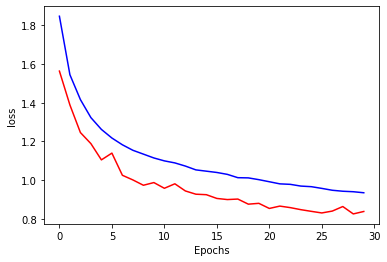

In [ ]:
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

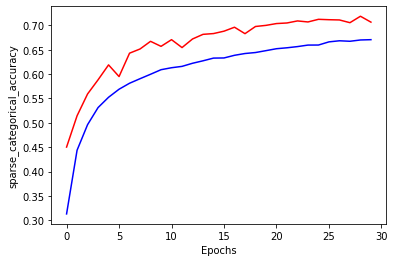

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

# Annexe: Choisir le learning rate
Le learning rate est LE paramètre le plus important à optimiser une fois que vous avez une architecture de réseau qui vous convient.

On a choisi d'utiliser un learning rate schedule mais comment choisir le learning rate?

1. On va tester différentes valeurs pour choisir un learning rate initial

Voir [ici](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/) pour plus d'informations sur comment tuner le learning rate

Voir la librairie Keras Tuner pour optimisation d'hyperparametres avec tensorflow

[voir ici pour optimisation hyperparametres](https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams)

[google automl](https://cloud.google.com/automl?hl=fr)

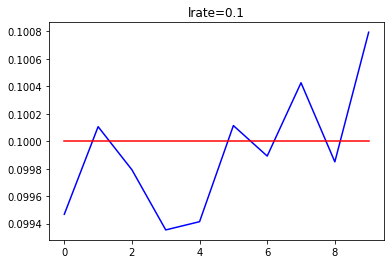

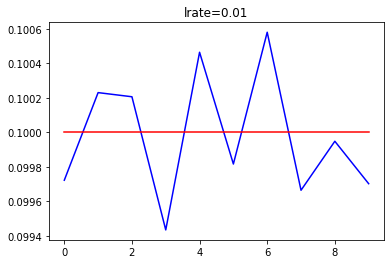

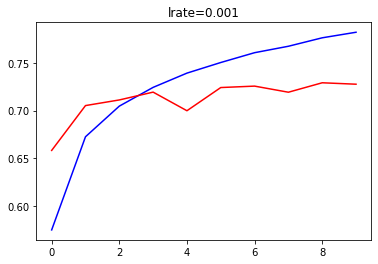

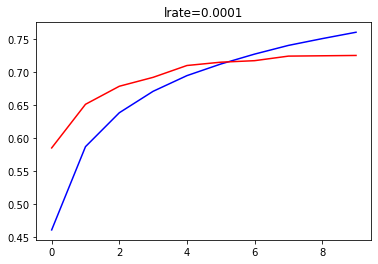

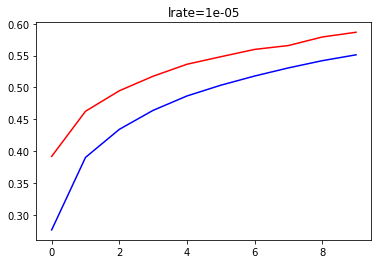

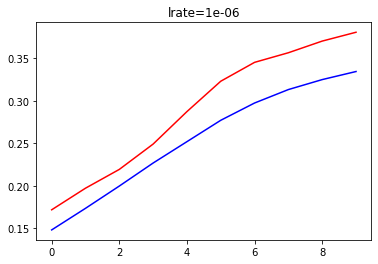

In [59]:
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="same"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=32, activation ="relu"),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
  ])

  return model

# On teste différentes valeurs entre 0.1 et 10^-6
learning_rates = [.1, .01, .001, .0001, .00001, .000001]
n_epoch = 10

for i,lr in enumerate(learning_rates):

  model = create_model()
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])
  
  history = model.fit(repeated_ds, 
                      epochs=n_epoch,
                      validation_data = ds_valid,
                      verbose=0)
  
  plt.plot(history.history['sparse_categorical_accuracy'], color="b", label='train')
  plt.plot(history.history['val_sparse_categorical_accuracy'], color="r", label='test')
  plt.title('lrate='+str(lr))
  plt.show()
